In [191]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy import signal



from scipy import signal
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split

import pickle 
import matplotlib.colors

from sklearn.neighbors import KNeighborsRegressor

participants_dps_csv_data = pd.read_csv("/Users/cslinxs/Desktop/all_weeks/pwdb_model_configs.csv")

print(participants_dps_csv_data.get(" dbp [mmHg]")[4])

78.067


{'20': [[], []], '30': [[], []], '40': [[], []], '50': [[], []], '60': [[], []], '70': [[], []]}


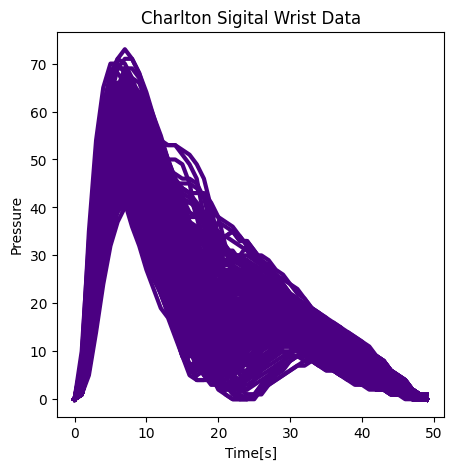

162


In [228]:
charlton_point_dbp = [[],[],[]]
plt.figure(figsize=(5, 5)) 
plt.rcParams['figure.figsize'] = [5, 5]




dict_people_ages = {}

for i in range(20,80,10):
    dict_people_ages[str(i)] = [[],[]]

print(dict_people_ages)

# will track age,dbp values
charlton_set_seen_duplicates =set()

Charlton_dataset_csv = "/Users/cslinxs/Desktop/all_weeks/Charlton_dataset_csv"
for files in os.listdir(Charlton_dataset_csv):
    if "_P.Csv" in files.title() and "Digital" in files.title():
        body_part = files.title().split("_")[1]
        function = files.title().split("_")[2]
        participants_csv_data = pd.read_csv(Charlton_dataset_csv+"/"+files)
        
        #plt.figure(figsize=(4, 5)) 
        for i in range(len(participants_csv_data)):
            y_points = participants_csv_data.iloc[i][1:].dropna()
            
            resampled_y = signal.resample(y_points, 50)
            resampled_y = [int(y - min(resampled_y)) for y in resampled_y]
            
            if not(True in list(np.isnan(resampled_y))):
                indivuals_set = (participants_dps_csv_data.get(" age [years]")[i],participants_dps_csv_data.get(" dbp [mmHg]")[i],participants_dps_csv_data.get(" pvr [Pa s/m^3]")[i])
                if not(indivuals_set in charlton_set_seen_duplicates):
                    charlton_point_dbp[0].append(resampled_y)
                    charlton_point_dbp[1].append(participants_dps_csv_data.get(" dbp [mmHg]")[i])
                    charlton_point_dbp[2].append(participants_dps_csv_data.get(" mbp [mmHg]")[i])
                    
                    plt.plot(resampled_y,linewidth=3.0, color="indigo" )
                    charlton_set_seen_duplicates.add(indivuals_set)
                    dict_people_ages[str((indivuals_set[0]//10)*10)][0].append(resampled_y)
                    dict_people_ages[str((indivuals_set[0]//10)*10)][1].append(participants_dps_csv_data.get(" dbp [mmHg]")[i])
        plt.title(f"Charlton Sigital Wrist Data")
        
        
        plt.xlabel("Time[s]")
        plt.ylabel("Pressure")
        # plt.xticks([])
        # plt.yticks([])
        plt.show()
print(len(charlton_set_seen_duplicates))


In [193]:
for i in dict_people_ages:
    print(len(dict_people_ages[i]))

2
2
2
2
2
2


In [194]:

participants_dps_csv_data = pd.read_csv("/Users/cslinxs/Desktop/all_weeks/pwdb_model_configs.csv")

# print(len(set(participants_dps_csv_data.get(" dbp [mmHg]"))))
# print(len(set(participants_dps_csv_data.get(" sv [ml]"))))

# print(len(set(participants_dps_csv_data.get(" pvr [Pa s/m^3]"))))

# for column in participants_dps_csv_data:
#     print(column, len(set(participants_dps_csv_data[column])))

In [195]:
print(len(all_points))

162


162


Text(79.455, 74.14237460225905, 'r2 -0.58')

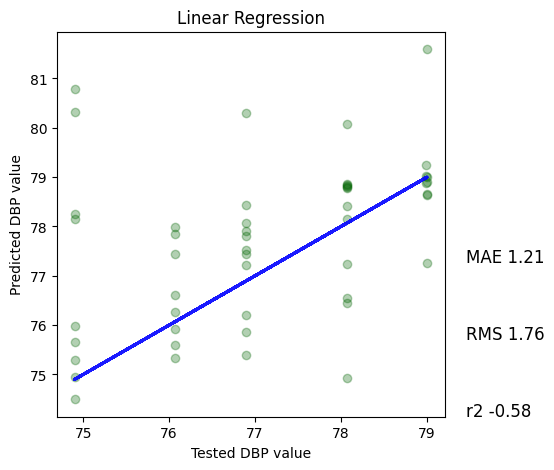

In [196]:
# single ones
plt.figure(figsize=(5, 5)) 
n_neighbors=1
#neigh = KNeighborsRegressor(n_neighbors=n_neighbors)
neigh = LinearRegression()


all_points = np.array(charlton_point_dbp[0])
all_points = all_points.reshape(all_points.shape[0], -1)
print(len(all_points))
X_train, X_test, Y_train, Y_test = train_test_split(all_points, np.array(charlton_point_dbp[1]), test_size=0.3)


X_test = X_test.reshape(X_test.shape[0], -1)

 
the_fit= neigh.fit(X_train, Y_train)

y_predict= neigh.predict(X_test)


plt.rcParams.update({'font.size': 10})

plt.scatter(Y_test, y_predict,  color="darkgreen",  alpha=0.3 )
plt.plot(Y_test, Y_test, color="blue", linewidth=2, alpha=0.9)

plt.title(f"KNN")
plt.title(f"Linear Regression")



plt.xlabel("Tested DBP value")
plt.ylabel("Predicted DBP value")

xmin, xmax, ymin, ymax = plt.axis()
plt.text(xmax+0.25, ymin+(ymax-ymin)*0.4,s=f"MAE {round(mean_absolute_error(Y_test, y_predict),2)}", fontsize=12)
plt.text(xmax+0.25, ymin+(ymax-ymin)*0.2, s= f"RMS {round(root_mean_squared_error(Y_test, y_predict),2)}", fontsize=12)
plt.text(xmax+0.25, ymin, s= f"r2 {round(r2_score(Y_test, y_predict),2)}", fontsize=12)


/var/folders/hp/g2knsnlj4y18ybnh9bjz7rkh0000gp/T/ipykernel_58862/3858254214.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(age_keys)
/var/folders/hp/g2knsnlj4y18ybnh9bjz7rkh0000gp/T/ipykernel_58862/3858254214.py:83: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(age_keys)


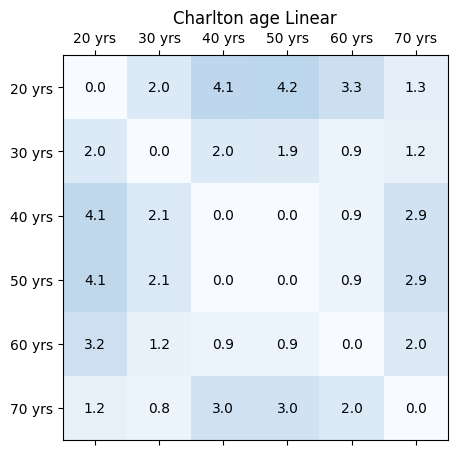

<Figure size 400x400 with 0 Axes>

In [170]:
# heat plots

# single ones
#neigh = KNeighborsRegressor(n_neighbors=1)


all_age_mae= []
maxi_mean = 0
for training_age in range(20,80,10):
    training_age = str(training_age)

    this_age_mae = []
    for testing_age in range(20,80,10):
        testing_age= str(testing_age)
        neigh = LinearRegression()
        
        #neigh = KNeighborsRegressor(n_neighbors=1)


        X = dict_people_ages[str(training_age)][0]
        Y = dict_people_ages[str(training_age)][1]

        X_other = dict_people_ages[str(testing_age)][0]
        Y_other = dict_people_ages[str(testing_age)][1]

        



        tests_size = int(len(Y)*0.3)

        X_test= np.array(X_other[:tests_size])
        Y_test= np.array(Y_other[:tests_size])

        X_test = X_test.reshape(X_test.shape[0], -1)
        Y_test = Y_test.reshape(Y_test.shape[0], -1)




        X_train =  np.array(X[tests_size:])
        Y_train= Y[tests_size:]


        X_train = X_train.reshape(X_train.shape[0], -1)



        the_fit= neigh.fit(X_train, Y_train)

        y_predict= neigh.predict(X_test)#, auscultatory_sbp[10])



        MAE = round(mean_absolute_error(Y_test, y_predict),2)


        #print(MAE)
        this_age_mae.append(MAE)

    if max(this_age_mae)>maxi_mean:
        maxi_mean= max(this_age_mae)
    all_age_mae.append(this_age_mae)








data = np.matrix(all_age_mae)

fig, ax = plt.subplots()
plt.figure(figsize=(4, 4)) 
cmap = matplotlib.colors.ListedColormap(['white','blue'])

# Using matshow here just because it sets the ticks up nicely. imshow is faster.
ax.matshow(data, cmap='Blues', vmin=0, vmax=15)
age_keys = [str(num)+" yrs" for num in range(10,90,10)]
plt.rcParams.update({'font.size': 10})
ax.set_xticklabels(age_keys)
ax.set_yticklabels(age_keys)

for (i, j), z in np.ndenumerate(data):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center', color = "black")
#bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3' )
ax.set_title("Charlton age Linear")
plt.show()




In [175]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, GlobalMaxPooling1D,ConvLSTM1D, MaxPooling1D, Flatten, LSTM
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error


import pickle

import pandas as pd
from pathlib import Path

import tensorflow as tf


Epoch 1/50


/Users/cslinxs/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step - loss: 4323.2949 - mae: 65.0659 - val_loss: 4201.1714 - val_mae: 64.8087
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7112.3906 - mae: 77.9987 - val_loss: 4417.8198 - val_mae: 66.4620
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3403.8718 - mae: 52.3630 - val_loss: 3785.9141 - val_mae: 61.5160
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5445.1597 - mae: 73.3132 - val_loss: 3907.3787 - val_mae: 62.4972
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4381.5645 - mae: 64.2921 - val_loss: 3464.9988 - val_mae: 58.8423
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1743.6687 - mae: 36.0989 - val_loss: 3130.1111 - val_mae: 55.9166
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6156.5801 - mae: 66.9991 - val_loss: 3433.6504 - val_mae: 58.5755
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5011.4844 - mae: 68.6397 - val_loss: 3323.8728 - val_mae: 57.6281
Epoch 9/50
1/1 ━━━━━━━━━━━

/var/folders/hp/g2knsnlj4y18ybnh9bjz7rkh0000gp/T/ipykernel_58862/1852921220.py:118: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(age_keys)
/var/folders/hp/g2knsnlj4y18ybnh9bjz7rkh0000gp/T/ipykernel_58862/1852921220.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(age_keys)


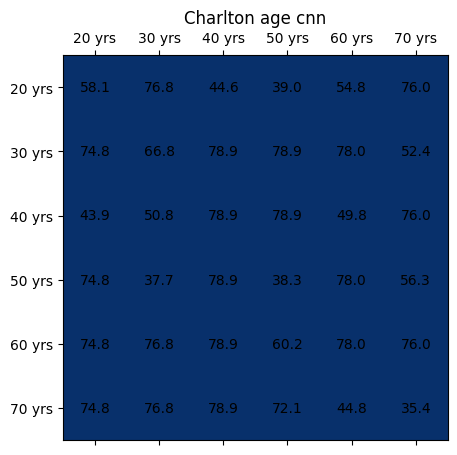

<Figure size 400x400 with 0 Axes>

In [189]:
# heat plots

# single ones
#neigh = KNeighborsRegressor(n_neighbors=1)


all_age_mae= []
maxi_mean = 0
for training_age in range(20,80,10):
    training_age = str(training_age)

    this_age_mae = []
    for testing_age in range(20,80,10):
        testing_age= str(testing_age)
        


        X = dict_people_ages[str(training_age)][0]
        Y = dict_people_ages[str(training_age)][1]

        X_other = dict_people_ages[str(testing_age)][0]
        Y_other = dict_people_ages[str(testing_age)][1]

        



        tests_size = int(len(Y)*0.3)

        X_test= np.array(X[:tests_size])
        Y_test= np.array(Y[:tests_size])

        X_test = X_test.reshape(X_test.shape[0], -1)
        Y_test = Y_test.reshape(Y_test.shape[0], -1)

        X_train= np.array(X_other)
        Y_train= np.array(Y_other)

        X_train = X_test.reshape(X_test.shape[0], -1)
        Y_train = Y_test.reshape(Y_test.shape[0], -1)


        #X = get_person_data_group(group_ppl_age,training_age)[0]
        # X = [item[0] for item in get_person_data_group(group_ppl_age,training_age)[0]]
        # y = get_person_data_group(group_ppl_age,training_age)[1]
        # print(y)
        # scaler = StandardScaler()
        # X = scaler.fit_transform(np.array(X))
        #print(X.shape)
        # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        X_test= np.array(X_other)
        Y_test= np.array(Y_other)

        X_test = X_test.reshape(X_test.shape[0], -1)
        Y_test = Y_test.reshape(Y_test.shape[0], -1)
        X_train= np.array(X_train)
       # print(y_train)


        def create_model():
            # model = Sequential()
            # model.add(Conv1D(filters=16, kernel_size=3,strides=3, activation='relu', input_shape=((X_train).shape[1], 1)))
            # model.add(Dropout(0.5))
            # model.add(Conv1D(64, kernel_size=3, strides=3, activation='relu'))
            # model.add(Dropout(0.5))
            # model.add(Flatten())
            # model.add(Dense(1))
            

            model = Sequential()
            model.add(Conv1D(filters=32, kernel_size=2,strides=2, activation='relu', input_shape=((X_train).shape[1], 1)))
            model.add(Dropout(0.5))
            model.add(Conv1D(64, kernel_size=5, strides=5, activation='relu'))
            model.add(Dropout(0.5))
            model.add(Conv1D(1, kernel_size=3, strides=1, activation='relu'))
            model.add(Dropout(0.5))
            
            model.add(Flatten())
            model.add(Dense(1))


            optimizer = RMSprop(0.001)

            model.compile(loss='mse',
                        optimizer=optimizer,
                        metrics=['mae',])

            return model
        model = create_model()
        history = model.fit(X_train, tf.stack(Y_train), epochs=50, validation_split=0.3)
        test_loss, test_accuracy = model.evaluate(X_test,tf.stack(Y_test) )


        print(test_accuracy)
        this_age_mae.append(test_accuracy)

    if max(this_age_mae)>maxi_mean:
        maxi_mean= max(this_age_mae)
    all_age_mae.append(this_age_mae)








data = np.matrix(all_age_mae)

fig, ax = plt.subplots()
plt.figure(figsize=(4, 4)) 
cmap = matplotlib.colors.ListedColormap(['white','blue'])

# Using matshow here just because it sets the ticks up nicely. imshow is faster.
ax.matshow(data, cmap='Blues', vmin=0, vmax=15)
age_keys = [str(num)+" yrs" for num in range(10,90,10)]
plt.rcParams.update({'font.size': 10})
ax.set_xticklabels(age_keys)
ax.set_yticklabels(age_keys)

for (i, j), z in np.ndenumerate(data): 
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center', color = "black") #'{:0.1f}'.format(z)
#bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3' )
ax.set_title("Charlton age cnn")
plt.show()




In [205]:

all_mea = []

for i in range(0,len(charlton_point_dbp),50): 



    X = charlton_point_dbp[0][0:i] +charlton_point_dbp[0][i+50:len(charlton_point_dbp)]
    Y = np.array(charlton_point_dbp[1][0:i] + charlton_point_dbp[1][i+50:len(charlton_point_dbp)])
    
    X_other = charlton_point_dbp[0][i:i+50] 
    Y_other = np.array(charlton_point_dbp[1][i:i+50])


    tests_size = int(len(Y)*0.3)

    X_test= np.array(X)
    Y_test= np.array(Y)

    # X_test = X_test.reshape(X_test.shape[0], -1)
    # Y_test = Y_test.reshape(Y_test.shape[0], -1)

    X_train= np.array(X_other)
    Y_train= np.array(Y_other)

    # X_train = X_test.reshape(X_test.shape[0], -1)
    # Y_train = Y_test.reshape(Y_test.shape[0], -1)


    def create_model():
        model = Sequential()
        model.add(Conv1D(filters=16, kernel_size=3,strides=3, activation='relu', input_shape=((X_train).shape[1], 1)))
        model.add(Dropout(0.5))
        model.add(Conv1D(64, kernel_size=3, strides=3, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Flatten())
        model.add(Dense(1))


        optimizer = RMSprop(0.001)

        model.compile(loss='mse',
                    optimizer=optimizer,
                    metrics=['mae',])

        return model
    model = create_model()
    history = model.fit(X_train, tf.stack(Y_train), epochs=50, validation_split=0.3)
    test_loss, test_accuracy = model.evaluate(X_test,tf.stack(Y_test) )


    print(test_accuracy)
    all_mea.append(test_accuracy)
        

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 5390.8960 - mae: 70.2288 - val_loss: 2632.1836 - val_mae: 51.2725
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2207.6833 - mae: 42.8695 - val_loss: 1375.9401 - val_mae: 36.9817
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1474.4625 - mae: 34.1679 - val_loss: 663.3842 - val_mae: 25.4837
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1241.5179 - mae: 29.6620 - val_loss: 431.1059 - val_mae: 20.3475
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 894.5476 - mae: 24.5734 - val_loss: 296.2677 - val_mae: 16.6349
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 682.3622 - mae: 21.5387 - val_loss: 306.8458 - val_mae: 16.9587
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 662.3986 - mae: 21.6025 - val_loss: 556.8294 - val_mae: 23.2727
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 977.4465 - mae: 27.1787 - val_loss: 239.4663 - val_mae: 14.7855
Epoch 9/50
2/2 ━━━━━━━━━━━

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

<BarContainer object of 3 artists>

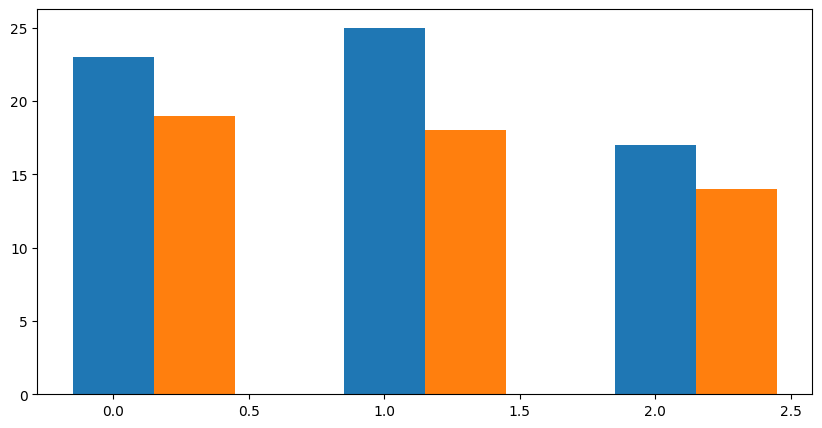

In [210]:
N = 3

# Data on X-axis

blue_bar = (23, 25, 17)
orange_bar = (19, 18, 14)

ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Blue bar label')
plt.bar(ind + width, orange_bar, width, label='Orange bar label')


<Axes: >

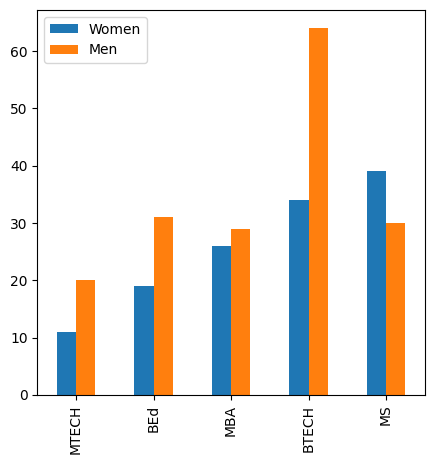

In [214]:
_data = {'Women': [11, 19, 26, 34, 39],
        'Men': [20, 31, 29, 64, 30]}
_df = pd.DataFrame(_data,columns=['Women', 'Men'], index = ['MTECH', 'BEd', 'MBA', 'BTECH', 'MS'])

_df.plot.bar()

# plt.show()

In [208]:

all_mea = []

for i in range(0,len(charlton_point_dbp),50): 



    X = charlton_point_dbp[0][0:i] +charlton_point_dbp[0][i+50:len(charlton_point_dbp)]
    Y = np.array(charlton_point_dbp[1][0:i] + charlton_point_dbp[1][i+50:len(charlton_point_dbp)])
    
    X_other = charlton_point_dbp[0][i:i+50] 
    Y_other = np.array(charlton_point_dbp[1][i:i+50])


    tests_size = int(len(Y)*0.3)

    X_test= np.array(X)
    Y_test= np.array(Y)

    # X_test = X_test.reshape(X_test.shape[0], -1)
    # Y_test = Y_test.reshape(Y_test.shape[0], -1)

    X_train= np.array(X_other)
    Y_train= np.array(Y_other)

    # X_train = X_test.reshape(X_test.shape[0], -1)
    # Y_train = Y_test.reshape(Y_test.shape[0], -1)


    neigh = LinearRegression()
        
    neigh = KNeighborsRegressor(n_neighbors=1)
    
    

    the_fit= neigh.fit(X_train, Y_train)

    y_predict= neigh.predict(X_test)


    plt.rcParams.update({'font.size': 10})

    plt.scatter(Y_test, y_predict,  color="darkgreen",  alpha=0.3 )
    plt.plot(Y_test, Y_test, color="blue", linewidth=2, alpha=0.9)

    plt.title(f"KNN")
    plt.title(f"Linear Regression")



    plt.xlabel("Tested DBP value")
    plt.ylabel("Predicted DBP value")

    xmin, xmax, ymin, ymax = plt.axis()
    plt.text(xmax+0.25, ymin+(ymax-ymin)*0.4,s=f"MAE {round(mean_absolute_error(Y_test, y_predict),2)}", fontsize=12)
    plt.text(xmax+0.25, ymin+(ymax-ymin)*0.2, s= f"RMS {round(root_mean_squared_error(Y_test, y_predict),2)}", fontsize=12)
    plt.text(xmax+0.25, ymin, s= f"r2 {round(r2_score(Y_test, y_predict),2)}", fontsize=12)


    print(test_accuracy)
    all_mea.append(test_accuracy)
        

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.